# Pandas - 数据处理

## 一、简介
Pandas是一个强大的分析结构化数据的工具集；它的使用基础是Numpy（提供高性能的矩阵运算）；用于数据挖掘和数据分析，同时也提供数据清洗功能。
- Series：一维数组，与Numpy中的一维array类似。二者与Python基本的数据结构List也很相近。Series如今能保存不同种数据类型，字符串、boolean值、数字等都能保存在Series中。
- Time- Series：以时间为索引的Series。
- DataFrame：二维的表格型数据结构。很多功能与R中的data.frame类似。可以将DataFrame理解为Series的容器。
- Panel ：三维的数组，可以理解为DataFrame的容器。
- Panel4D：是像Panel一样的4维数据容器。
- PanelND：拥有factory集合，可以创建像Panel4D一样N维命名容器的模块。

## 二、基本使用

(1) 生成序列

In [2]:
import pandas as pd
import numpy as np
a1 = pd.Series([1,2,3,np.nan,44,1])
print(a1)

0     1.0
1     2.0
2     3.0
3     NaN
4    44.0
5     1.0
dtype: float64


(2) 生成日期

In [3]:
# Signature: pd.date_range(start=None, end=None, periods=None, freq='D',
# tz=None, normalize=False, name=None, closed=None, **kwargs)
datas = pd.date_range('20190101',periods=6)
print(datas)

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06'],
              dtype='datetime64[ns]', freq='D')


(3)生成数据

In [5]:
# 定义行列
pd.options.display.latex.repr = True
df = pd.DataFrame(np.random.randn(6,4),index=datas,columns=['a','b','c','d'])
print(df)

                   a         b         c         d
2019-01-01 -1.827772 -0.531354 -1.622942  0.431109
2019-01-02  1.375977  0.843072  0.129542 -0.188062
2019-01-03 -0.811599  0.509739  1.882667 -0.465470
2019-01-04 -1.124745 -0.085944 -0.878450  1.044464
2019-01-05 -0.525588  0.236661  0.691960 -0.388467
2019-01-06 -0.099283  0.464138 -0.690725 -0.443162


In [5]:
# 不定义行列
df1 = pd.DataFrame(np.arange(12).reshape(3,4))
print(df1)
print(df1.describe()) #计算

   0  1   2   3
0  0  1   2   3
1  4  5   6   7
2  8  9  10  11
         0    1     2     3
count  3.0  3.0   3.0   3.0
mean   4.0  5.0   6.0   7.0
std    4.0  4.0   4.0   4.0
min    0.0  1.0   2.0   3.0
25%    2.0  3.0   4.0   5.0
50%    4.0  5.0   6.0   7.0
75%    6.0  7.0   8.0   9.0
max    8.0  9.0  10.0  11.0


(4) 基本操作

In [6]:
# 用字典定义
df2 = pd.DataFrame({'A':'aaa','B':pd.Categorical([1,2])}) #缺失的会复制
print(df2)
print(df2.dtypes)
print(df2.index) # 打印行索引
print(df2.columns)# 打印列索引
print(df2.values) # 打印值

     A  B
0  aaa  1
1  aaa  2
A      object
B    category
dtype: object
RangeIndex(start=0, stop=2, step=1)
Index(['A', 'B'], dtype='object')
[['aaa' 1]
 ['aaa' 2]]


In [7]:
print(df2.T) # 转制

     0    1
A  aaa  aaa
B    1    2


In [8]:
df = pd.DataFrame(np.random.randn(6,4),index=datas,columns=['a','b','c','d'])
df.sort_index(axis=1,ascending=False)

,d,c,b,a
2019-01-01,0.128799,-0.518779,0.330869,-0.824062
2019-01-02,-1.068894,-0.173618,0.617653,-0.751745
2019-01-03,1.121319,1.364454,-0.953911,0.479669
2019-01-04,-0.530579,1.451950,-2.636916,1.056513
2019-01-05,-1.787981,1.137431,-0.304709,-0.757666
2019-01-06,-0.043301,1.114942,-0.741527,0.732124


In [9]:
df.sort_index(axis=0,ascending=False)

,a,b,c,d
2019-01-06,0.732124,-0.741527,1.114942,-0.043301
2019-01-05,-0.757666,-0.304709,1.137431,-1.787981
2019-01-04,1.056513,-2.636916,1.451950,-0.530579
2019-01-03,0.479669,-0.953911,1.364454,1.121319
2019-01-02,-0.751745,0.617653,-0.173618,-1.068894
2019-01-01,-0.824062,0.330869,-0.518779,0.128799


In [10]:
# 根据某一参数排序
df.sort_values(by='c')

,a,b,c,d
2019-01-01,-0.824062,0.330869,-0.518779,0.128799
2019-01-02,-0.751745,0.617653,-0.173618,-1.068894
2019-01-06,0.732124,-0.741527,1.114942,-0.043301
2019-01-05,-0.757666,-0.304709,1.137431,-1.787981
2019-01-03,0.479669,-0.953911,1.364454,1.121319
2019-01-04,1.056513,-2.636916,1.451950,-0.530579


## 三、进阶使用

(1) 切片取值

In [11]:
df = pd.DataFrame(np.random.randn(6,4),index=datas,columns=['a','b','c','d'])
df['a']

2019-01-01   -0.594394
2019-01-02    1.330821
2019-01-03    0.576713
2019-01-04    0.319288
2019-01-05   -1.593440
2019-01-06    0.510239
Freq: D, Name: a, dtype: float64

In [12]:
# 直接索引
df[0:3]

,a,b,c,d
2019-01-01,-0.594394,-0.311155,-1.830367,0.936767
2019-01-02,1.330821,0.356165,-0.032444,-1.256583
2019-01-03,0.576713,-0.154052,-0.178772,-1.579583


In [13]:
# 通过下标查找(类似于EXCEL中的行列号)
df.iloc[0:3]

,a,b,c,d
2019-01-01,-0.594394,-0.311155,-1.830367,0.936767
2019-01-02,1.330821,0.356165,-0.032444,-1.256583
2019-01-03,0.576713,-0.154052,-0.178772,-1.579583


In [14]:
df.iloc[0:3,1:2]

,b
2019-01-01,-0.311155
2019-01-02,0.356165
2019-01-03,-0.154052


In [15]:
df.iloc[0:1,:]

,a,b,c,d
2019-01-01,-0.594394,-0.311155,-1.830367,0.936767


In [16]:
# 通过标签查找(类似于EXCEL中的标签行列)
df.loc['20190101',:]

a   -0.594394
b   -0.311155
c   -1.830367
d    0.936767
Name: 2019-01-01 00:00:00, dtype: float64

(2)筛选

In [17]:
# 按条件筛选
df[df['a']>0.01]

,a,b,c,d
2019-01-02,1.330821,0.356165,-0.032444,-1.256583
2019-01-03,0.576713,-0.154052,-0.178772,-1.579583
2019-01-04,0.319288,-0.174463,0.196253,-1.380464
2019-01-06,0.510239,-1.660528,-1.231889,1.033905


（3）修改

In [18]:
df = pd.DataFrame(np.random.randn(6,4),index=datas,columns=['a','b','c','d'])
df.iloc[2,2] = 5.5555
df

,a,b,c,d
2019-01-01,-0.471488,1.003316,0.456503,-0.143689
2019-01-02,0.769127,0.654736,0.705153,1.166533
2019-01-03,-0.321302,2.411168,5.555500,0.257331
2019-01-04,0.080875,1.597265,-1.645810,-0.523571
2019-01-05,-0.394856,-0.545806,2.759848,-0.724230
2019-01-06,1.183177,1.844851,-0.606020,-0.568103


In [19]:
df[df['a']<0] = 1
df

,a,b,c,d
2019-01-01,1.000000,1.000000,1.000000,1.000000
2019-01-02,0.769127,0.654736,0.705153,1.166533
2019-01-03,1.000000,1.000000,1.000000,1.000000
2019-01-04,0.080875,1.597265,-1.645810,-0.523571
2019-01-05,1.000000,1.000000,1.000000,1.000000
2019-01-06,1.183177,1.844851,-0.606020,-0.568103


In [20]:
df.a[df['a']>0.5] = 5
df

,a,b,c,d
2019-01-01,5.000000,1.000000,1.000000,1.000000
2019-01-02,5.000000,0.654736,0.705153,1.166533
2019-01-03,5.000000,1.000000,1.000000,1.000000
2019-01-04,0.080875,1.597265,-1.645810,-0.523571
2019-01-05,5.000000,1.000000,1.000000,1.000000
2019-01-06,5.000000,1.844851,-0.606020,-0.568103


(4) 处理丢失数据

In [22]:
df = pd.DataFrame(np.random.randn(6,4),index=datas,columns=['a','b','c','d'])
df.iloc[0,1] = np.nan
df.iloc[1,2] = np.nan
df

,a,b,c,d
2019-01-01,-0.888267,NaN,-0.684180,0.765152
2019-01-02,0.715632,-1.475551,NaN,1.439851
2019-01-03,0.170366,-1.041533,-0.995647,-0.761464
2019-01-04,0.690599,-0.355992,-1.024922,1.819981
2019-01-05,0.073247,0.168519,0.030926,-0.560486
2019-01-06,0.898563,-0.819442,1.114552,-0.345878


In [25]:
df.dropna(axis=0,how='all') # all

,a,b,c,d
2019-01-01,-0.888267,NaN,-0.684180,0.765152
2019-01-02,0.715632,-1.475551,NaN,1.439851
2019-01-03,0.170366,-1.041533,-0.995647,-0.761464
2019-01-04,0.690599,-0.355992,-1.024922,1.819981
2019-01-05,0.073247,0.168519,0.030926,-0.560486
2019-01-06,0.898563,-0.819442,1.114552,-0.345878


In [26]:
df.dropna(axis=0,how='any') # all

,a,b,c,d
2019-01-03,0.170366,-1.041533,-0.995647,-0.761464
2019-01-04,0.690599,-0.355992,-1.024922,1.819981
2019-01-05,0.073247,0.168519,0.030926,-0.560486
2019-01-06,0.898563,-0.819442,1.114552,-0.345878


In [27]:
df = pd.DataFrame(np.random.randn(6,4),index=datas,columns=['a','b','c','d'])
df.iloc[0,1] = np.nan
df.iloc[1,2] = np.nan
df.fillna(value=1000)

,a,b,c,d
2019-01-01,-0.223862,1000.000000,-0.139916,0.001834
2019-01-02,-0.652105,-0.574343,1000.000000,-0.050037
2019-01-03,0.130309,-0.503977,-0.562584,-0.788056
2019-01-04,-0.078800,-2.379986,-0.445765,-0.648634
2019-01-05,1.882564,-2.354507,2.398400,-0.702385
2019-01-06,-1.685440,0.833976,0.695541,0.085804


In [28]:
df = pd.DataFrame(np.random.randn(6,4),index=datas,columns=['a','b','c','d'])
df.iloc[0,1] = np.nan
df.iloc[1,2] = np.nan
df.isnull()

,a,b,c,d
2019-01-01,False,True,False,False
2019-01-02,False,False,True,False
2019-01-03,False,False,False,False
2019-01-04,False,False,False,False
2019-01-05,False,False,False,False
2019-01-06,False,False,False,False


(5) 导入导出数据

pandas可以读取csv、excel、hdf、sql、json、msgpack、html、gbq、stata、clipboard、pickle。读取的格式为read_xxx,写的格式为to_xxx

In [5]:
# 读取CSV
import pandas as pd
data = pd.read_csv('lessons/csvtest1.csv')
print(data)

   a  b  c
0  1  2  6


In [6]:
# 存储为任意格式
data.to_pickle('lessons/csvtest1.pickle')

(6)合并数据

In [10]:
import pandas as pd
import numpy as np
df0 = pd.DataFrame(np.ones((3,4))*0, columns=['a','b','c','d'])
df1 = pd.DataFrame(np.ones((3,4))*1, columns=['a','b','c','d'])
df2 = pd.DataFrame(np.ones((3,4))*2, columns=['a','b','c','d'])
print(df0)
print(df1)
print(df2)

     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
     a    b    c    d
0  1.0  1.0  1.0  1.0
1  1.0  1.0  1.0  1.0
2  1.0  1.0  1.0  1.0
     a    b    c    d
0  2.0  2.0  2.0  2.0
1  2.0  2.0  2.0  2.0
2  2.0  2.0  2.0  2.0


In [11]:
res = pd.concat([df0,df1,df2], axis=0)
print(res)

     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
0  1.0  1.0  1.0  1.0
1  1.0  1.0  1.0  1.0
2  1.0  1.0  1.0  1.0
0  2.0  2.0  2.0  2.0
1  2.0  2.0  2.0  2.0
2  2.0  2.0  2.0  2.0


In [12]:
res = pd.concat([df0,df1,df2], axis=1)
print(res)

     a    b    c    d    a    b    c    d    a    b    c    d
0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  2.0  2.0  2.0  2.0
1  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  2.0  2.0  2.0  2.0
2  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  2.0  2.0  2.0  2.0


In [13]:
res = pd.concat([df0,df1,df2], axis=0, ignore_index=True)
print(res)

     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  1.0  1.0  1.0  1.0
4  1.0  1.0  1.0  1.0
5  1.0  1.0  1.0  1.0
6  2.0  2.0  2.0  2.0
7  2.0  2.0  2.0  2.0
8  2.0  2.0  2.0  2.0


In [14]:
# join,['inner','outer']
import pandas as pd
import numpy as np
df0 = pd.DataFrame(np.ones((3,4))*0, columns=['a','b','c','d'],index=[1,2,3])
df1 = pd.DataFrame(np.ones((3,4))*1, columns=['b','c','d','e'],index=[2,3,4])
print(df0)
print(df1)

     a    b    c    d
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  0.0  0.0  0.0  0.0
     b    c    d    e
2  1.0  1.0  1.0  1.0
3  1.0  1.0  1.0  1.0
4  1.0  1.0  1.0  1.0


In [20]:
res = pd.concat([df0,df1],join='outer',sort=False)
print(res)

     a    b    c    d    e
1  0.0  0.0  0.0  0.0  NaN
2  0.0  0.0  0.0  0.0  NaN
3  0.0  0.0  0.0  0.0  NaN
2  NaN  1.0  1.0  1.0  1.0
3  NaN  1.0  1.0  1.0  1.0
4  NaN  1.0  1.0  1.0  1.0


In [19]:
res = pd.concat([df0,df1],join='inner',ignore_index=True)
print(res)

     b    c    d
0  0.0  0.0  0.0
1  0.0  0.0  0.0
2  0.0  0.0  0.0
3  1.0  1.0  1.0
4  1.0  1.0  1.0
5  1.0  1.0  1.0


In [21]:
# res = pd.merge()   merge

(7) plot画图

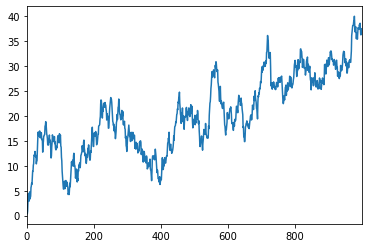

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
data  = pd.Series(np.random.randn(1000),index=np.arange(1000))
data = data.cumsum()
data.plot()
plt.show()

          A         B         C         D
0  0.974012  0.561218 -0.131577 -0.200416
1 -0.919047  0.841148  1.332129  3.073820
2  0.776398 -0.759945  0.432874 -1.984264
3  0.451592  0.860054  1.288291  0.109215
4 -0.675333  0.668391  0.082529  0.273594


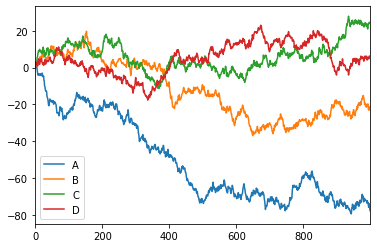

In [4]:
data = pd.DataFrame(np.random.randn(1000,4),index=np.arange(1000),columns=list('ABCD'))
print(data.head())
data = data.cumsum()
data.plot()
plt.show()

参考文献  
1. [数据分析三剑客之pandas](https://www.cnblogs.com/peng104/p/10398490.html)